In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import textwrap
from matplotlib.ticker import FixedLocator

In [4]:
df = pd.read_csv("../Mental health 2023./CSV/prevalence-of-anxiety-disorders-males-vs-females.csv")
df.shape

(56395, 8)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56395 entries, 0 to 56394
Data columns (total 8 columns):
 #   Column                                                                          Non-Null Count  Dtype  
---  ------                                                                          --------------  -----  
 0   index                                                                           56395 non-null  int64  
 1   Entity                                                                          56395 non-null  object 
 2   Code                                                                            54079 non-null  object 
 3   Year                                                                            56395 non-null  int64  
 4   Prevalence - Anxiety disorders - Sex: Male - Age: Age-standardized (Percent)    6840 non-null   float64
 5   Prevalence - Anxiety disorders - Sex: Female - Age: Age-standardized (Percent)  6840 non-null   float64
 6   Population (his

In [6]:
#count, mean, standard deviation, minimum, and quartiles for each numerical column.
df.describe()

,index,Year,Prevalence - Anxiety disorders - Sex: Male - Age: Age-standardized (Percent),Prevalence - Anxiety disorders - Sex: Female - Age: Age-standardized (Percent),Population (historical estimates)
count,56395.000000,56395.000000,6840.000000,6840.000000,5.565600e+04
mean,28197.000000,1609.133753,3.288552,5.330749,3.246352e+07
std,16279.978552,1408.030315,0.802864,1.580392,2.503028e+08
min,0.000000,-10000.000000,1.396401,2.425174,1.000000e+00
25%,14098.500000,1833.000000,2.794638,4.250238,1.338740e+05
50%,28197.000000,1901.000000,3.161505,5.062602,1.218570e+06
75%,42295.500000,1966.000000,3.624807,6.016830,5.396250e+06
max,56394.000000,2021.000000,6.503852,12.064718,7.874966e+09


In [7]:
# check for missing values
df.isnull().sum()

index                                                                                 0
Entity                                                                                0
Code                                                                               2316
Year                                                                                  0
Prevalence - Anxiety disorders - Sex: Male - Age: Age-standardized (Percent)      49555
Prevalence - Anxiety disorders - Sex: Female - Age: Age-standardized (Percent)    49555
Population (historical estimates)                                                   739
Continent                                                                         56110
dtype: int64

In [8]:
#unique values
df.nunique()

index                                                                             56395
Entity                                                                              316
Code                                                                                286
Year                                                                                259
Prevalence - Anxiety disorders - Sex: Male - Age: Age-standardized (Percent)       6840
Prevalence - Anxiety disorders - Sex: Female - Age: Age-standardized (Percent)     6840
Population (historical estimates)                                                 51142
Continent                                                                             7
dtype: int64

In [9]:
min_year = df['Year'].min()
max_year = df['Year'].max()

print(f"Zakres lat: {min_year} - {max_year}")


Zakres lat: -10000 - 2021


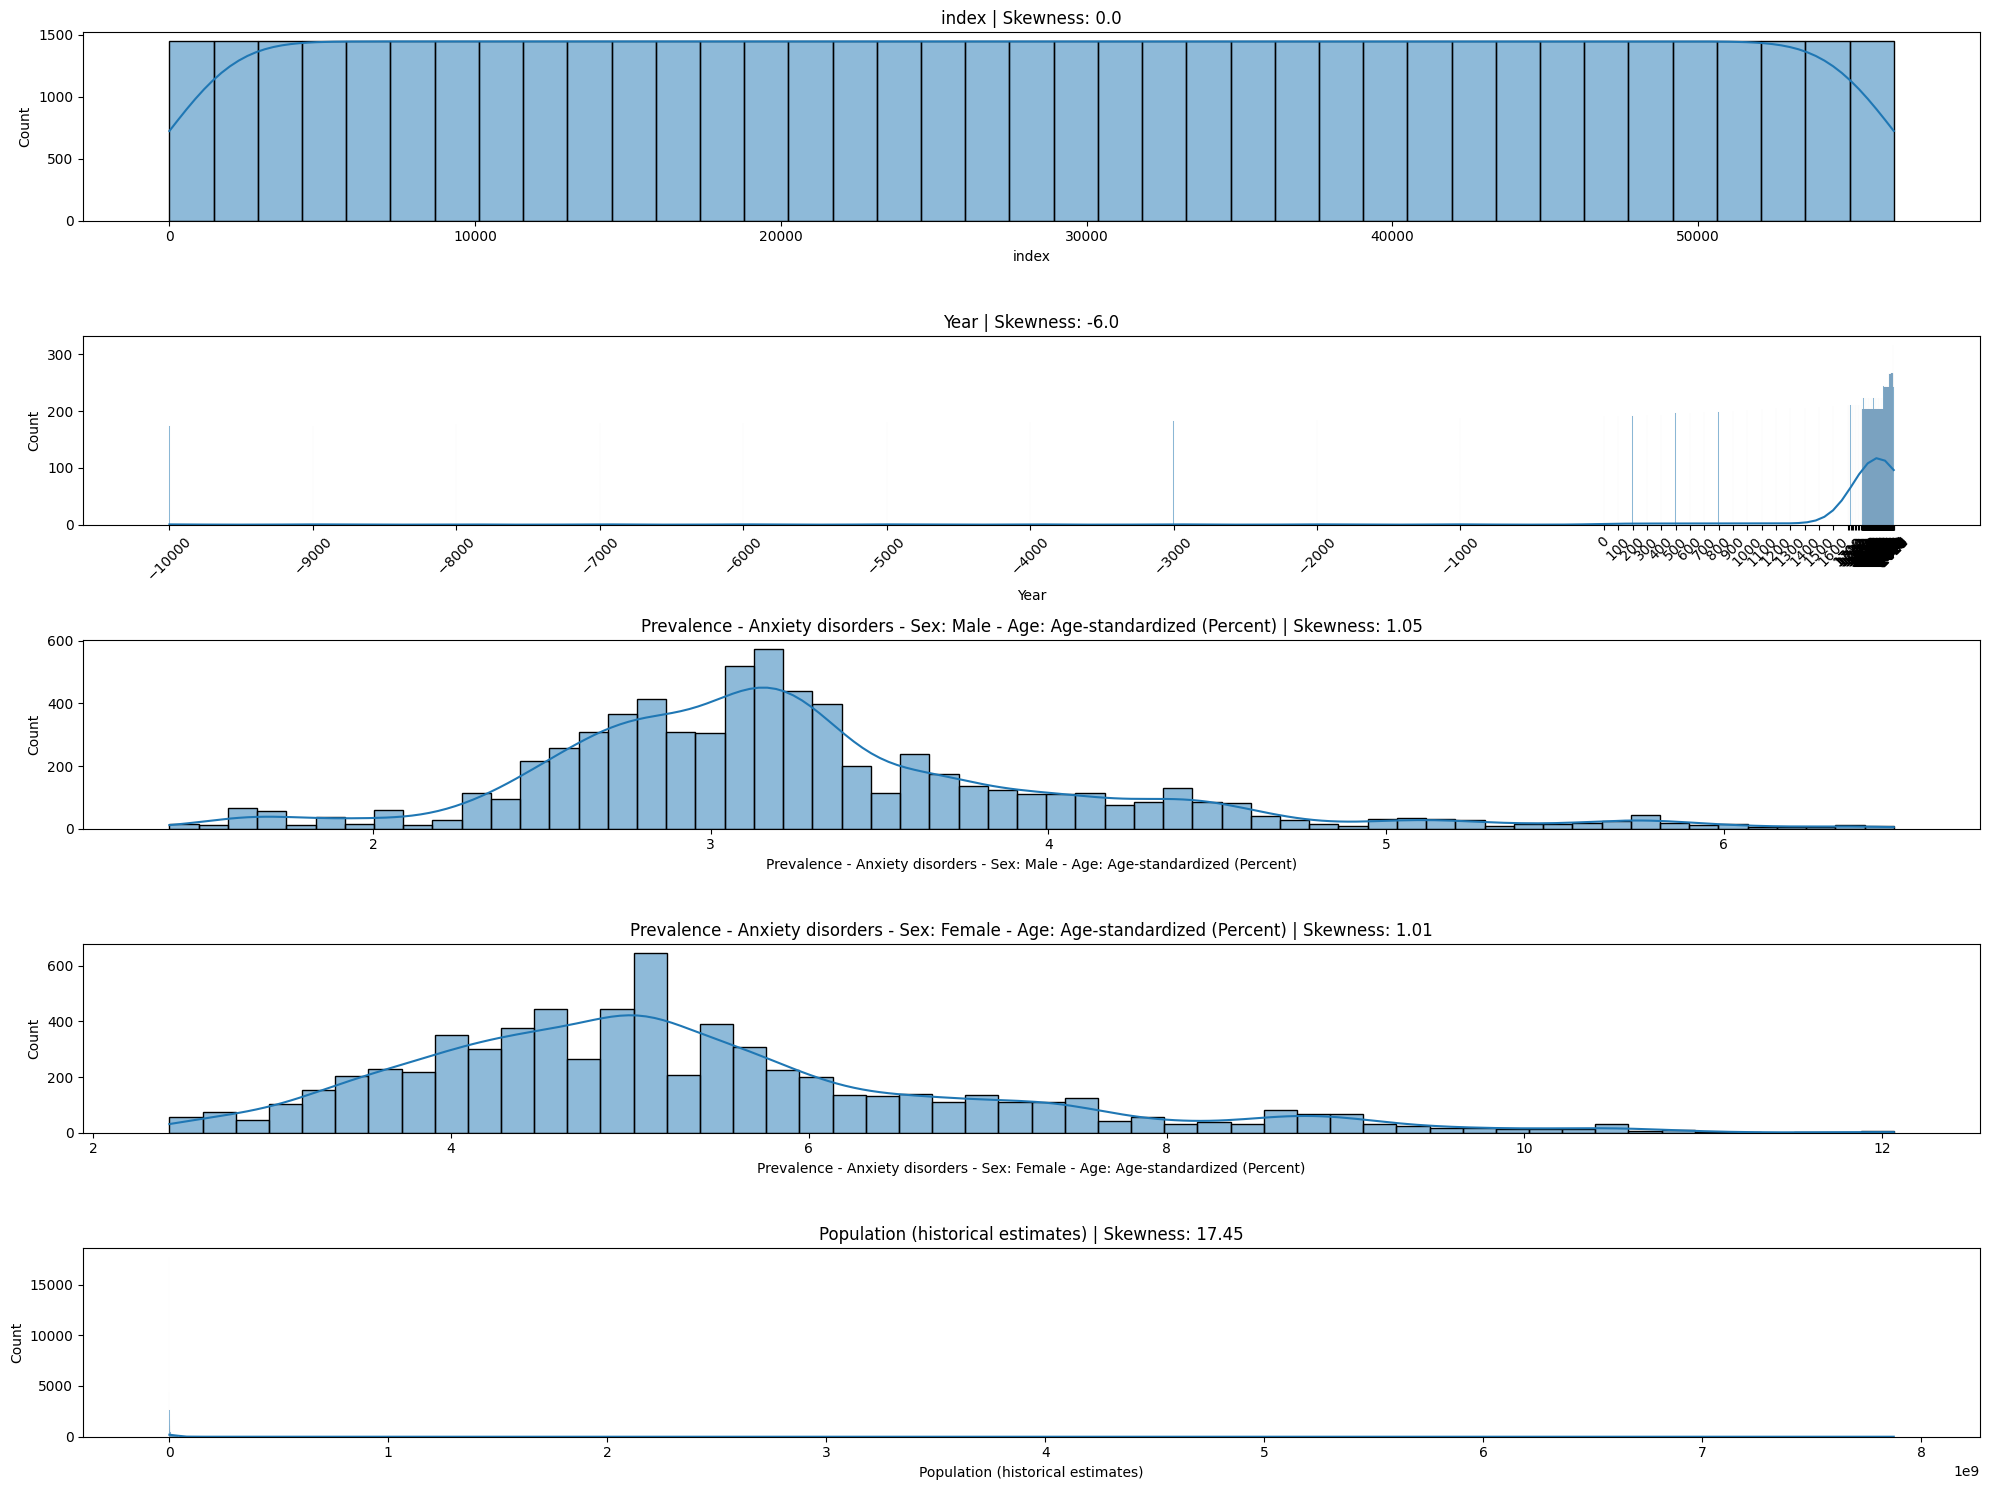

In [10]:
numerical_columns = df.select_dtypes(include=["int64", "float64"]).columns

plt.figure(figsize=(20, len(numerical_columns) * 3))
for idx, feature in enumerate(numerical_columns, 1):
    plt.subplot(len(numerical_columns), 1, idx)
    plt.title(f"{feature} | Skewness: {round(df[feature].skew(), 2)}")
    if feature == 'Year':
        sns.histplot(df[feature].dropna(), kde=True, discrete=True)
        unique_years = df['Year'].dropna().sort_values().unique()  
        plt.xticks(unique_years, rotation=45) 
    else:
        sns.histplot(df[feature].dropna(), kde=True)
    



plt.tight_layout()
plt.show()
